In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (5,5)

<h1 style=color:#eea65a> look at dataFrame </h1>


In [3]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby("area_type").size()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<h1 style=color:#ff4d4d>cleaning data</h1>
<h4>drop unnecessory columns from data set</h4> 

In [6]:
df1=df.drop(["area_type","availability","society","balcony"],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

<h3 style=color:black> we have few nan data in compare of all data (73 << 13320 ) so we can remove them </h3>

In [8]:
df1.dropna(inplace=True)
df1.shape

(13246, 5)

In [9]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

<h3> ummm!! we should change size column to number</h3>

In [10]:
df1["rooms"]=df1["size"].apply(lambda x : int(x.split(" ")[0]))
df1.head()

,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df1.rooms.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

<h3>43 rooms!! is it a house or hotel??!! it seems that's needs cleaning </h3>

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   rooms       13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


<h4>total_sqft is not number! we should fix that<h4>
    we need see how our data is

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
     
    return True

object1=df1[~df1["total_sqft"].apply(is_float)]["total_sqft"]
object1.head()

30     2100 - 2850
122    3067 - 8156
137    1042 - 1105
165    1145 - 1340
188    1015 - 1540
Name: total_sqft, dtype: object

<h4>we should change this range to a number<h4>
    this function change object to number and if it's a number ,returns it without changing

In [14]:
def object_to_float(x):
    y=x.split("-")
    if len(y)==2:
        return (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
object_to_float("2100 - 2850")# this is a example|

2475.0

In [16]:
df2=df1.copy()

In [17]:
df2["total_sqft"]=df2["total_sqft"].apply(object_to_float)


In [18]:
df2["total_sqft"].dtype

dtype('float64')

yes we succeed!!

In [19]:
df2.total_sqft.isnull().sum()

46

In [20]:
df2.dropna(inplace=True)
df2.shape

(13200, 6)

<h2 style="color:#D6806D">Feature Engineering</h2>

In [21]:
value_count=df2.location.value_counts()
value_count

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

<h3> we could replace location under 10 counts to other for simplify modeling</h3>

In [22]:
loc_other=value_count[value_count<=10]
loc_other.size

1058

In [23]:
df2["location"]=df2.location.apply(lambda x: "other" if x in loc_other else x)

In [24]:
df2.head(20)

,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,other,6 Bedroom,1020.0,6.0,370.00,6


### add new feature

In [25]:
df2["price_per_sqft"]=df2["price"]*100000/df2["total_sqft"]
df2.head()

,location,size,total_sqft,bath,price,rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
df3=df2[~(df2["total_sqft"]/df2["rooms"]<300)]
df3.shape

(12456, 7)

### remove outliers from price

In [59]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-3*s))&(subdf.price_per_sqft<=(m+3*s))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4=df3.copy()
df4=remove_pps_outlier(df3)
df4
    


,location,size,total_sqft,bath,price,rooms,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
12260,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
12261,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
12262,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
12263,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('rooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('rooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(8620, 7)

In [ ]:
def plot_price_meter(df,location):
    Hue=df[(df["location"]==location)&((df.rooms==2) |(df.rooms==3))]
    sns.scatterplot(x=Hue["total_sqft"],y=Hue["price"],hue=Hue["rooms"],palette="muted")
plot_price_meter(df5,"Rajaji Nagar")

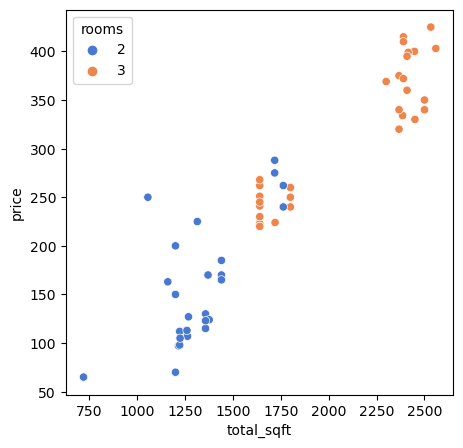

In [62]:
plot_price_meter(df6,"Rajaji Nagar")

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

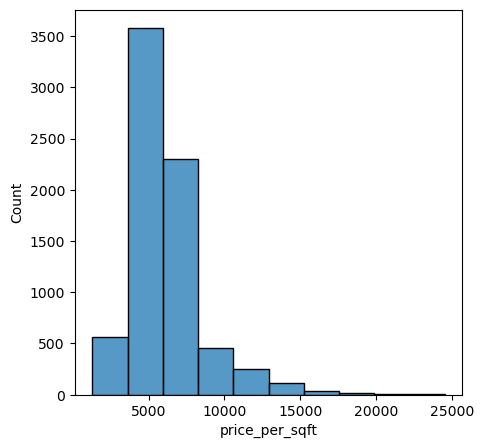

In [34]:
sns.histplot(df6["price_per_sqft"],bins=10)

<AxesSubplot:xlabel='bath', ylabel='Count'>

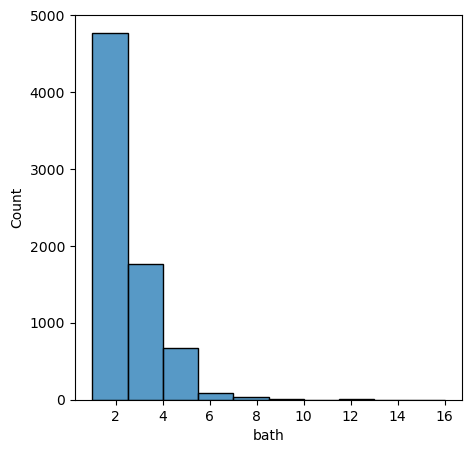

In [35]:
sns.histplot(df6["bath"],bins=10)

In [36]:
df6 = df6[df6.bath<df6.rooms+2]
df6.shape

(7253, 7)

In [37]:
df_final= df6.drop(['size','price_per_sqft'],axis=1)
df_final.head(3)

,location,total_sqft,bath,price,rooms
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2


In [38]:
df_final.reset_index(drop=True, inplace=True)

In [39]:
df_final.head()

,location,total_sqft,bath,price,rooms
0,Devarachikkanahalli,1250.0,2.0,40.0,2
1,Devarachikkanahalli,1200.0,2.0,83.0,2
2,Devarachikkanahalli,1170.0,2.0,40.0,2
3,Devarachikkanahalli,1425.0,2.0,65.0,3
4,Devarachikkanahalli,947.0,2.0,43.0,2


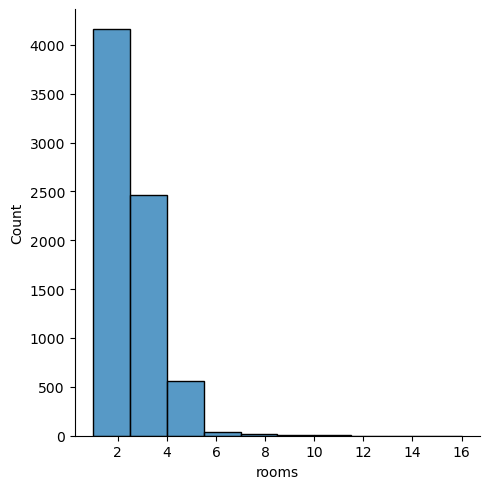

In [40]:
sns.displot(df_final["rooms"],bins=10)

In [41]:
df_final.head(3)

,location,total_sqft,bath,price,rooms
0,Devarachikkanahalli,1250.0,2.0,40.0,2
1,Devarachikkanahalli,1200.0,2.0,83.0,2
2,Devarachikkanahalli,1170.0,2.0,40.0,2


In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(df_final[["location"]]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [43]:
dummy=pd.get_dummies(df_final["location"])
df_finall=df_final.drop("location",axis=1).join(dummy.drop("other",axis=1))

In [44]:
df_finall

,total_sqft,bath,price,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7249,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7250,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7251,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
x=df_finall.drop("price",axis=1)
y=df_finall.price
x.shape,y.shape

((7253, 243), (7253,))

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape

((5802, 243), (1451, 243))

In [47]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7780866051089405

In [48]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=5)
cvl=cross_val_score(LinearRegression(),x,y,cv=cv)

In [49]:
np.mean(cvl)

0.8326817733714806

In [50]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model(x,y):
    models={
    "linearRegression":{
        "model":LinearRegression(),
        "params":{
            "normalize":[True,False]
        }
    },
    'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [i for i in range(1,3)],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    score={}
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for key,value in models.items():
        clf=GridSearchCV(value["model"],value["params"],cv=cv,return_train_score=False)
        clf.fit(x,y)
        score[key]={"best score":clf.best_score_,"best params":clf.best_params_}
    return pd.DataFrame(score)
find_best_model(x,y)

,linearRegression,lasso,decision_tree
best score,0.848456,0.709027,0.75316
best params,{'normalize': False},"{'alpha': 1, 'selection': 'random'}","{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [51]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [52]:
np.where(x.columns=="Vijayanagar")[0][0]

233

In [53]:
x.columns[0]

'total_sqft'